In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TSP 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns



In [405]:
data = pd.read_csv('data.csv')
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [406]:
#BMI = w/h**2
BMI = data['Weight'] / (data['Height']**2)
BMI = pd.DataFrame({'BMI' : BMI})
BMI

,BMI
0,24.386526
1,24.238227
2,23.765432
3,26.851852
4,28.342381
...,...
2106,44.901475
2107,43.741923
2108,43.543817
2109,44.071535


In [407]:
data_mod = data
data_mod.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [408]:
# make a new column and add it to the modified data
data_mod['BMI'] = BMI
data_mod.sample(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
901,Male,19.241058,1.856811,88.633616,yes,yes,2.047069,3.829101,Sometimes,no,1.641022,no,1.554817,0.248218,Sometimes,Public_Transportation,Overweight_Level_I,25.707691
1564,Male,30.304203,1.703202,103.034400,yes,yes,2.754645,2.175432,Sometimes,no,1.541733,no,0.358709,1.073900,no,Public_Transportation,Obesity_Type_II,35.518117
964,Female,17.099015,1.600000,65.000000,yes,yes,3.000000,2.401341,Sometimes,no,2.000000,yes,0.663896,1.753745,Sometimes,Public_Transportation,Overweight_Level_I,25.390625
1151,Male,25.457630,1.837399,95.952027,yes,yes,1.122127,2.865657,Sometimes,no,2.000000,no,1.287750,1.944177,Sometimes,Public_Transportation,Overweight_Level_II,28.421514
1326,Female,40.702771,1.548403,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,1.326165,no,0.000000,0.000000,Sometimes,Automobile,Obesity_Type_I,33.367370
556,Male,18.000000,1.781543,50.869704,no,yes,2.052932,3.000000,Sometimes,no,2.000000,no,0.520408,1.000000,Sometimes,Public_Transportation,Insufficient_Weight,16.027530
291,Male,17.000000,1.800000,58.000000,no,yes,2.000000,3.000000,Frequently,no,2.000000,no,2.000000,1.000000,no,Walking,Insufficient_Weight,17.901235
828,Female,21.987341,1.730182,78.554440,yes,yes,2.293705,1.000000,Sometimes,no,2.000000,no,2.063943,0.000000,Sometimes,Public_Transportation,Overweight_Level_I,26.241409
285,Male,21.000000,1.790000,105.000000,yes,yes,2.000000,3.000000,Always,no,1.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Obesity_Type_I,32.770513
1188,Female,19.005725,1.599999,73.513873,yes,no,2.942154,2.667711,Sometimes,no,2.184768,no,1.524405,0.805008,Sometimes,Public_Transportation,Overweight_Level_II,28.716393


In [409]:
#let us drop the height and the weight as we no longer need them we have the BMI
data_mod = data_mod.drop(columns=['Height','Weight'])
data_mod.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,24.386526
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,24.238227
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,23.765432
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,26.851852
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,28.342381


In [410]:
data_mod.duplicated().sum()

24

In [411]:
data_mod['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [412]:
#let's have Xs features and the y feature the target
X = data_mod.drop(columns=['NObeyesdad'])
X



,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,BMI
0,Female,21.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,24.386526
1,Female,21.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,24.238227
2,Male,23.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,23.765432
3,Male,27.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,26.851852
4,Male,22.000000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,28.342381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,44.901475
2107,Female,21.982942,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,43.741923
2108,Female,22.524036,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,43.543817
2109,Female,24.361936,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,44.071535


In [413]:
Y = data_mod[['NObeyesdad']] # if data_mod['NObeyesdad'] so Y would not be a dataFrame but a series
Y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [414]:
#let's just get red of the strings
X = pd.get_dummies(X)
X

,Age,FCVC,NCP,CH2O,FAF,TUE,BMI,Gender_Female,Gender_Male,family_history_with_overweight_no,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.000000,2.0,3.0,2.000000,0.000000,1.000000,24.386526,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,21.000000,3.0,3.0,3.000000,3.000000,0.000000,24.238227,1,0,0,...,1,0,0,1,0,0,0,0,1,0
2,23.000000,2.0,3.0,2.000000,2.000000,1.000000,23.765432,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.000000,3.0,3.0,2.000000,2.000000,0.000000,26.851852,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,22.000000,2.0,1.0,2.000000,0.000000,0.000000,28.342381,0,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,3.0,3.0,1.728139,1.676269,0.906247,44.901475,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2107,21.982942,3.0,3.0,2.005130,1.341390,0.599270,43.741923,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2108,22.524036,3.0,3.0,2.054193,1.414209,0.646288,43.543817,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2109,24.361936,3.0,3.0,2.852339,1.139107,0.586035,44.071535,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [415]:
#how about the y values count
Y.value_counts()
#we have 7 values


NObeyesdad         
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
dtype: int64

In [416]:
type(Y)

pandas.core.frame.DataFrame

In [417]:
Y.rename

<bound method DataFrame.rename of                NObeyesdad
0           Normal_Weight
1           Normal_Weight
2           Normal_Weight
3      Overweight_Level_I
4     Overweight_Level_II
...                   ...
2106     Obesity_Type_III
2107     Obesity_Type_III
2108     Obesity_Type_III
2109     Obesity_Type_III
2110     Obesity_Type_III

[2111 rows x 1 columns]>

In [418]:
Y.rename(columns={'NObeyesdad' : 'Target'})

,Target
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [419]:
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
Y

c:\Users\msi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 4, 4, 4])

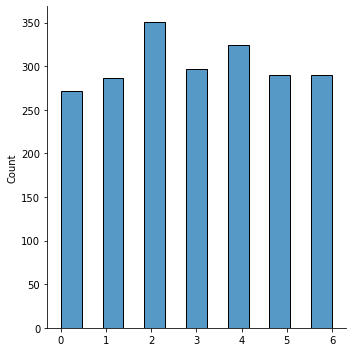

In [420]:

sns.displot(Y)

In [421]:
#let's divide thee data to training and testing
X_train, X_test, Y_train, Y_test = TSP(X,Y, test_size=1/3, random_state= 3)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 1407 samples.
Testing set has 704 samples.


In [422]:
#let's build the tree 🌳 
treemod = DTC()
treemod.fit(X_train, Y_train)
Y_pred_train = treemod.predict(X_train)
Y_pred_test = treemod.predict(X_test)


In [423]:
print('train_accuracy', accuracy_score(Y_train, Y_pred_train))
print('test accuracy', accuracy_score(Y_test, Y_pred_test))

train_accuracy 1.0
test accuracy 0.9630681818181818


In [424]:
print(treemod)

DecisionTreeClassifier()


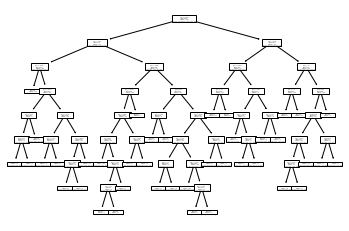

In [425]:
tree.plot_tree(treemod);

In [433]:
fig = plt.figure(figsize=(50,30), dpi=400)
_ = tree.plot_tree(treemod, 
                   
                   filled=True)